In [24]:
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt

In [25]:
df=pd.read_csv('Churn_Modelling.csv')

In [26]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [27]:
### Differentiate between Dependent and Indpendent Code
X=df.iloc[:,3:13]
y=df.iloc[:,13]

In [28]:
X.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,France,Female,42,2,0.00,1,1,1,101348.88
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58
2,502,France,Female,42,8,159660.80,3,1,0,113931.57
3,699,France,Female,39,1,0.00,2,0,0,93826.63
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10


In [29]:
Geography=pd.get_dummies(X['Geography'],drop_first=True)
Gender=pd.get_dummies(X['Gender'],drop_first=True)

In [32]:
Geography=Geography.astype(int)
Geography

,Germany,Spain
0,0,0
1,0,1
2,0,0
3,0,0
4,0,1
...,...,...
9995,0,0
9996,0,0
9997,0,0
9998,1,0


In [34]:
Gender=Gender.astype(int)
Gender

,Male
0,0
1,0
2,0
3,0
4,0
...,...
9995,1
9996,1
9997,0
9998,1


In [35]:
X.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,France,Female,42,2,0.00,1,1,1,101348.88
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58
2,502,France,Female,42,8,159660.80,3,1,0,113931.57
3,699,France,Female,39,1,0.00,2,0,0,93826.63
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10


In [36]:
X=X.drop(['Geography','Gender'],axis=1)

In [37]:
X.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,42,2,0.00,1,1,1,101348.88
1,608,41,1,83807.86,1,0,1,112542.58
2,502,42,8,159660.80,3,1,0,113931.57
3,699,39,1,0.00,2,0,0,93826.63
4,850,43,2,125510.82,1,1,1,79084.10


In [38]:
pd.concat([X,Geography,Gender],axis=1)

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Germany,Spain,Male
0,619,42,2,0.00,1,1,1,101348.88,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,1,0
2,502,42,8,159660.80,3,1,0,113931.57,0,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,771,39,5,0.00,2,1,0,96270.64,0,0,1
9996,516,35,10,57369.61,1,1,1,101699.77,0,0,1
9997,709,36,7,0.00,1,0,1,42085.58,0,0,0
9998,772,42,3,75075.31,2,1,0,92888.52,1,0,1


In [39]:
### Train Test Split
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)

In [40]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()

In [43]:
X_train=sc.fit_transform(X_train)

In [45]:
X_test=sc.transform(X_test)

In [48]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LeakyReLU,PReLU,ELU
from tensorflow.keras.layers import Dropout

In [49]:
classifier=Sequential()

In [50]:
###Input Layer
classifier.add(Dense(units=11,activation='relu'))


In [51]:
### Hidden Layer1
classifier.add(Dense(units=7,activation='relu'))

In [52]:
### Hidden Layer2
classifier.add(Dense(units=5,activation='relu'))

In [53]:
### Output Layer
classifier.add(Dense(1,activation='sigmoid'))

In [55]:
classifier.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [75]:
### Early Stopping
from tensorflow import keras
earlyStopping=keras.callbacks.EarlyStopping(
    monitor="val_loss",
    min_delta=0.0001,
    patience=25,
    verbose=1,
    mode="auto",
    baseline=None,
    restore_best_weights=False,
    start_from_epoch=0,
)

In [72]:
model_history=classifier.fit(X_train,y_train,validation_split=0.33,batch_size=10,epochs=1000,callbacks=earlyStopping)

Epoch 1/1000
536/536 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8507 - loss: 0.3443 - val_accuracy: 0.8436 - val_loss: 0.3731
Epoch 2/1000
536/536 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8648 - loss: 0.3257 - val_accuracy: 0.8489 - val_loss: 0.3732
Epoch 3/1000
536/536 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8577 - loss: 0.3421 - val_accuracy: 0.8478 - val_loss: 0.3748
Epoch 4/1000
536/536 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8626 - loss: 0.3332 - val_accuracy: 0.8444 - val_loss: 0.3756
Epoch 5/1000
536/536 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8714 - loss: 0.3128 - val_accuracy: 0.8474 - val_loss: 0.3721
Epoch 6/1000
536/536 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8660 - loss: 0.3297 - val_accuracy: 0.8455 - val_loss: 0.3756
Epoch 7/1000
536/536 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8598 - loss: 0.3354 - val_accuracy: 0.8474 - val_loss: 0.3757
Epoch 8/1000
536/536 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8633 - loss: 0.3263 - 

In [76]:
model_history.history.keys()

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

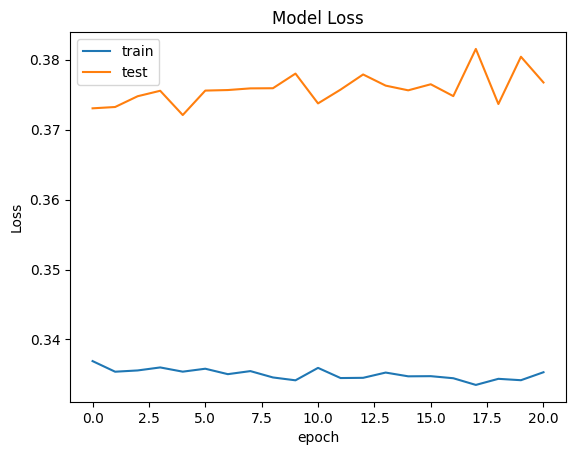

In [78]:
### Plotting the graph
plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('Loss')
plt.title('Model Loss')
plt.legend(['train','test'],loc='upper left')
plt.show()

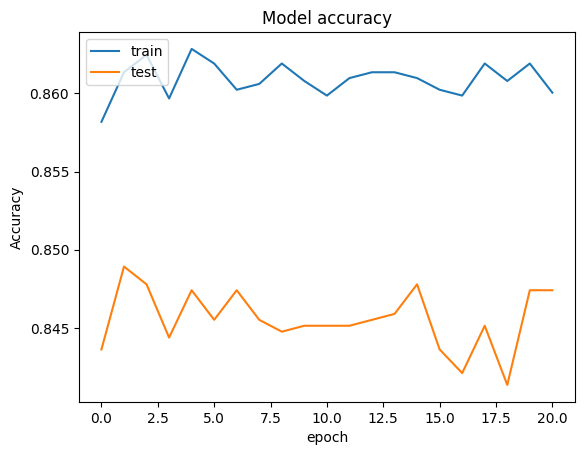

In [79]:
### Plotting the graph
plt.plot(model_history.history['accuracy'])
plt.plot(model_history.history['val_accuracy'])
plt.xlabel('epoch')
plt.ylabel('Accuracy')
plt.title('Model accuracy')
plt.legend(['train','test'],loc='upper left')
plt.show()

In [81]:
y_pred=classifier.predict(X_test)
y_pred=(y_pred>0.5)

63/63 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step


In [87]:
from sklearn.metrics import confusion_matrix,accuracy_score
confusion=confusion_matrix(y_test,y_pred)
accuracy=accuracy_score(y_test,y_pred)

In [88]:
confusion

array([[1543,   52],
       [ 230,  175]])

In [89]:
accuracy

0.859

In [90]:
classifier.get_weights()

[array([[ 1.6125971e-01,  9.8868303e-02,  5.3044818e-02, -1.5970711e-02,
         -1.6006565e-01,  2.5297271e-02, -3.2381933e-02,  3.4539402e-02,
          1.4594831e-01, -8.6894430e-02, -6.2666543e-02],
        [-6.4617026e-01,  1.1478999e-01,  4.1777629e-02,  8.7119180e-01,
         -1.8826950e-01,  2.4469836e-01,  4.4239068e-01, -5.1480716e-01,
         -9.0813512e-01, -4.1142350e-01,  6.5194035e-01],
        [-3.5565841e-01, -3.8293067e-01,  1.5972214e-02, -4.8645888e-02,
          1.5926409e-01, -3.0596820e-01, -1.2973152e-02, -7.7964231e-02,
         -8.9713126e-02, -4.0620148e-01,  7.0261257e-04],
        [-6.8172403e-02,  2.1409091e-01, -8.0925322e-01, -1.9355002e-01,
         -1.1918024e-01, -7.2896361e-01, -1.0572806e-01, -6.7180261e-02,
         -6.4187509e-01,  3.7803310e-01,  6.1537188e-02],
        [ 2.8562167e-01,  7.0215118e-01, -2.4929879e-02,  8.7125361e-01,
          7.9874355e-01, -7.2274661e-01, -7.0077252e-01, -2.0393163e-01,
          1.2303046e-01, -1.9445407e-0